## Group number:6
## Team members name: Huynh Trung Tru,Anup Painuly,Ankit Malviya,Nikhilesh Bhalerao
## Your name:
## Your task:

In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import ttest_ind, f_oneway
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV,train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, log_loss
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [4]:
housing = pd.read_csv("./Dataset/merged_files.csv")
housing.head(10)


,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5,6797000,1220,Horamavu,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
6,20000000,2502,Thanisandra,Bangalore,4,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
7,7105000,1438,Ramamurthy Nagar,Bangalore,3,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
8,8405000,1405,Whitefield Hope Farm Junction,Bangalore,3,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
9,3506000,660,Electronic City Phase 1,Bangalore,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning And PreProcessing

In [6]:
# Specify the specific value to drop rows containing
specific_value = 9

# Drop rows with the specific value
#housing_filtered = housing[~(housing['City'] == specific_value)]

housing_filtered = housing[~(housing == specific_value).any(axis=1)]

#Removing Duplicate rows
housing_filtered = housing_filtered.drop_duplicates()
print(housing_filtered.shape)
housing_filtered.head(15)

(8226, 41)


,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5,6797000,1220,Horamavu,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
6,20000000,2502,Thanisandra,Bangalore,4,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
7,7105000,1438,Ramamurthy Nagar,Bangalore,3,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
8,8405000,1405,Whitefield Hope Farm Junction,Bangalore,3,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
9,3506000,660,Electronic City Phase 1,Bangalore,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Data Analysis and Visualization

## Distribution of houses across cites

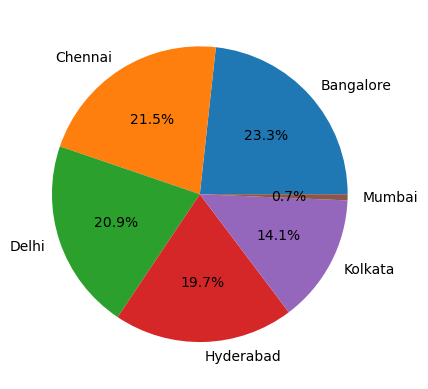

In [7]:
data = housing_filtered['City'].value_counts().tolist()
labels = housing_filtered['City'].unique().tolist()

# Create the pie chart
plt.pie(data, labels=labels,autopct='%1.1f%%')
plt.show()

## Correlation between the area of the property and its price? Visualize the relationship

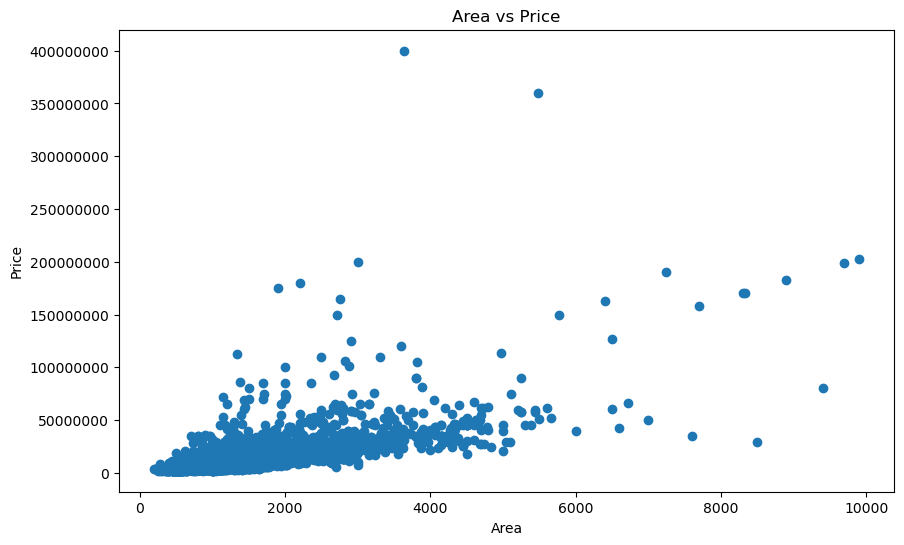

In [9]:
price = housing_filtered['Price']
area = housing_filtered['Area']
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(area, price)
plt.title("Area vs Price")
plt.ticklabel_format(style='plain', axis='y', scilimits=(5,3))
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## Correlation between City & Price

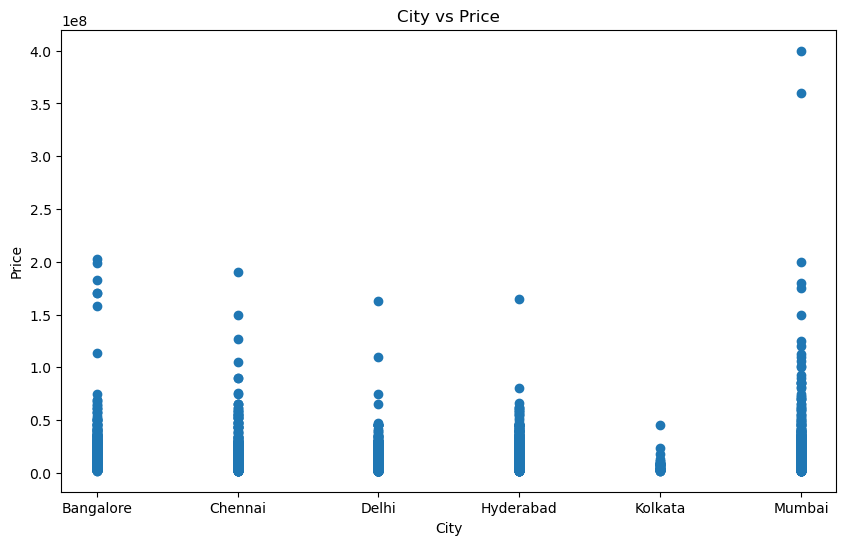

In [10]:
price = housing_filtered['Price']
city = housing_filtered['City']
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city, price)
plt.title("City vs Price")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

## Correlation between Swimming pool & Price

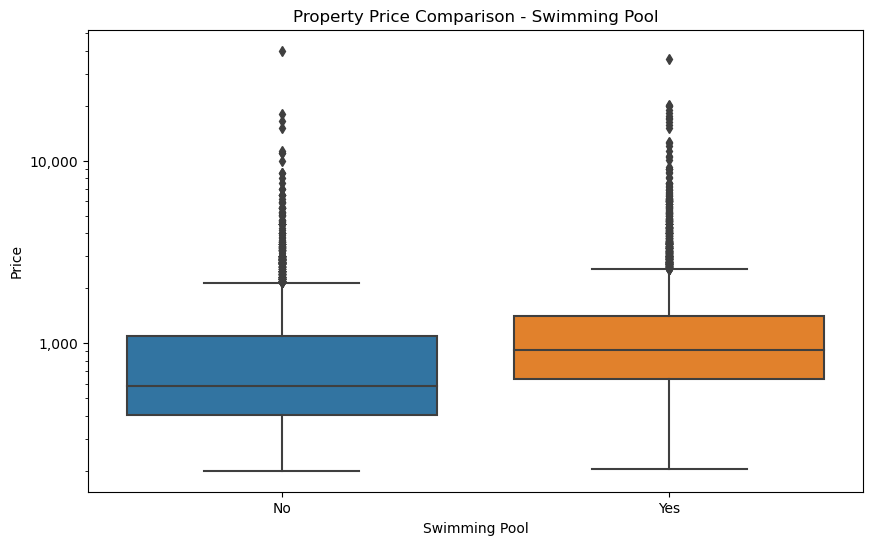

In [91]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SwimmingPool', y='Price', data=housing_filtered)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e4):,}'))
plt.title("Property Price Comparison - Swimming Pool")
plt.xlabel("Swimming Pool")
plt.ylabel("Price")
plt.xticks([0, 1], ['No', 'Yes'])  # Customize x-axis labels
plt.show()

## Stacked bar chart to show the availability of different amenities (such as lift, vaastu compliant, microwave, etc.) for properties in different locations.

In [13]:
amenities = ['LiftAvailable', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']
grouped_data = housing_filtered.groupby('City')[amenities].sum()

<Figure size 1200x600 with 0 Axes>

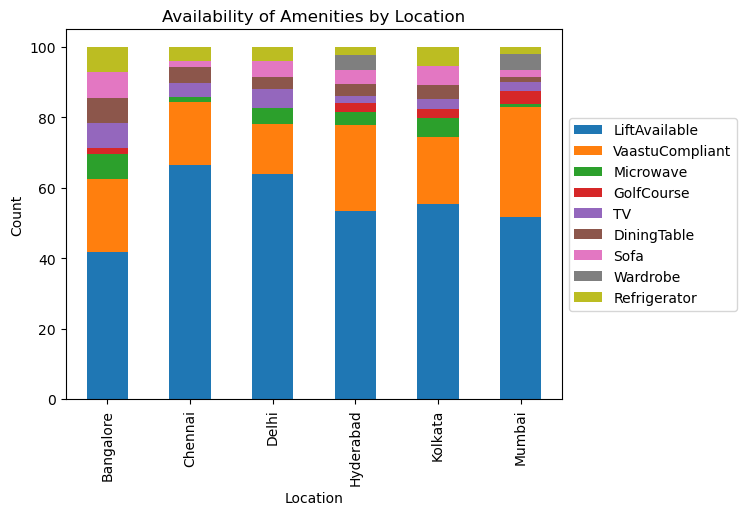

In [95]:
plt.figure(figsize=(12, 6))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
normalized_data.plot(kind='bar', stacked=True)
plt.title("Availability of Amenities by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Hypothesis Testing 

###  Hypothesis1:To test the hypothesis of whether there is a significant difference in the average price between properties with and without a golf course nearby,We can use a two-sample t-test. 


In [92]:
# Extract the relevant columns
price_with_golf = housing_filtered[housing_filtered['GolfCourse'] == 1]['Price']
price_without_golf = housing_filtered[housing_filtered['GolfCourse'] == 0]['Price']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(price_with_golf, price_without_golf)

# Print the results
data = [['T-Statistic', t_statistic], ['P-Value', p_value]]
headers = ['Statistic', 'Value']
print(tabulate(data, headers=headers))

Statistic         Value
-----------  ----------
T-Statistic  6.92668
P-Value      4.6328e-12


### Conclusion: As the p-value is less than 0.05, thus the null hypothesis is rejected.Thus we can say that houses with a golf cousre nearby have significant difference in average price when compared with houses without a golf course nearby.

### Hypothesis 2:To test the hypothesis of whether there is a significant difference in the average price between properties with and without landscaped gardens. 


In [20]:
# Extract the relevant columns
price_with_gardens =housing_filtered[housing_filtered['LandscapedGardens'] == 1]['Price']
price_without_gardens = housing_filtered[housing_filtered['LandscapedGardens'] == 0]['Price']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(price_with_gardens, price_without_gardens)
# Print the results
data = [['T-Statistic', t_statistic], ['P-Value', p_value]]
headers = ['Statistic', 'Value']
print(tabulate(data, headers=headers))

Statistic          Value
-----------  -----------
T-Statistic  11.1501
P-Value       1.1476e-28


### Conclusion: As the p-value is less than 0.05, thus the null hypothesis is rejected.Thus we can say that houses with a Landscaped Gardens have significant difference in average price when compared with houses without a Landscaped Gardens.

### Hypothesis 3:To test the hypothesis of whether there is a significant relation between price and area of a property.

In [22]:
# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(housing_filtered['Area'],housing_filtered['Price'])

# Print the results
data = [['T-Statistic', t_statistic], ['P-Value', p_value]]
headers = ['Statistic', 'Value']
print(tabulate(data, headers=headers))

Statistic       Value
-----------  --------
T-Statistic  -72.2774
P-Value        0


### Conclusion: As the p-value is 0.0, thus the null hypothesis is rejected and we can say that there is a strong correlation between price and area of properties.

### Hypothesis 4:To test the hypothesis of whether there is a significant difference in the average price among properties located in different cities.

In [24]:
#We can use a one-way analysis of variance (ANOVA) test.

# Group the prices by city
city_groups = housing_filtered.groupby('City')['Price'].apply(list)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*city_groups)

# Print the results
data = [['T-Statistic', t_statistic], ['P-Value', p_value]]
headers = ['Statistic', 'Value']
print(tabulate(data, headers=headers))

Statistic            Value
-----------  -------------
T-Statistic  -72.2774
P-Value        1.77015e-40


### Conclusion: As the p-value is less than 0.05, thus the null hypothesis is rejected and we can say that there is a significant difference in the average price among  properties located in different cities.

### Hypothesis 5:To test the hypothesis of whether there is a any relationship between area of properties and school nearby.

In [72]:
# Extract the relevant columns
price_with_gardens =housing_filtered[housing_filtered['School'] == 1]['Area']
price_without_gardens = housing_filtered[housing_filtered['School'] == 0]['Area']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(price_with_gardens, price_without_gardens)
# Print the results
data = [['T-Statistic', t_statistic], ['P-Value', p_value]]
headers = ['Statistic', 'Value']
print(tabulate(data, headers=headers))

Statistic       Value
-----------  --------
T-Statistic  1.63736
P-Value      0.101594


### Conclusion: As the p-value is more than 0.05, thus the null hypothesis is accepted and we can say that there is a no significant relationship between area of properties and school nearby.

# Machine Learning Models

# LogisticsRegression

In [76]:
X = housing_filtered.drop(['Resale','Location','City'], axis = 1)
y = housing_filtered['Resale']

In [80]:
log_reg = LogisticRegression()

In [81]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {
    'C':[0.1, 1, 10], 'penalty':['11','l2']
}

gcv = GridSearchCV(log_reg, param_grid=params, cv=kfold,  scoring='neg_log_loss')
gcv.fit(X,y)
print("Best parameter", gcv.best_params_)
print("Best score", gcv.best_score_)

Best parameter {'C': 0.1, 'penalty': 'l2'}
Best score -0.6426658105085485


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-

In [82]:
## train test split for logitics regression
X = housing_filtered[['VaastuCompliant']]
y = housing_filtered['Resale']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [83]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict_proba(X_test)
print(log_loss(y_test, y_pred))

0.6465006470690587


In [84]:
majority_class = y_train.value_counts().idxmax()

baseline_predictions = np.full_like(y_test, majority_class)

# Calculate the baseline log loss
baseline_log_loss = log_loss(y_test, np.column_stack((1 - baseline_predictions, baseline_predictions)))

print("Baseline Log Loss:", baseline_log_loss)

Baseline Log Loss: 12.559781975138067


## Random forest

In [86]:
X = housing_filtered.drop(['Resale','Location','City'], axis = 1)
y = housing_filtered['Resale']

In [87]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')
gcv_rf.fit(X,y)
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.296 total time=   0.9s
[CV 2/5] END ...................max_features=2;, score=-0.307 total time=   0.6s
[CV 3/5] END ...................max_features=2;, score=-0.339 total time=   0.6s
[CV 4/5] END ...................max_features=2;, score=-0.332 total time=   0.6s
[CV 5/5] END ...................max_features=2;, score=-0.382 total time=   0.5s
[CV 1/5] END ...................max_features=3;, score=-0.334 total time=   0.6s
[CV 2/5] END ...................max_features=3;, score=-0.307 total time=   0.6s
[CV 3/5] END ...................max_features=3;, score=-0.304 total time=   0.6s
[CV 4/5] END ...................max_features=3;, score=-0.351 total time=   0.6s
[CV 5/5] END ...................max_features=3;, score=-0.402 total time=   0.6s
[CV 1/5] END ...................max_features=4;, score=-0.370 total time=   0.6s
[CV 2/5] END ...................max_features=4;, 

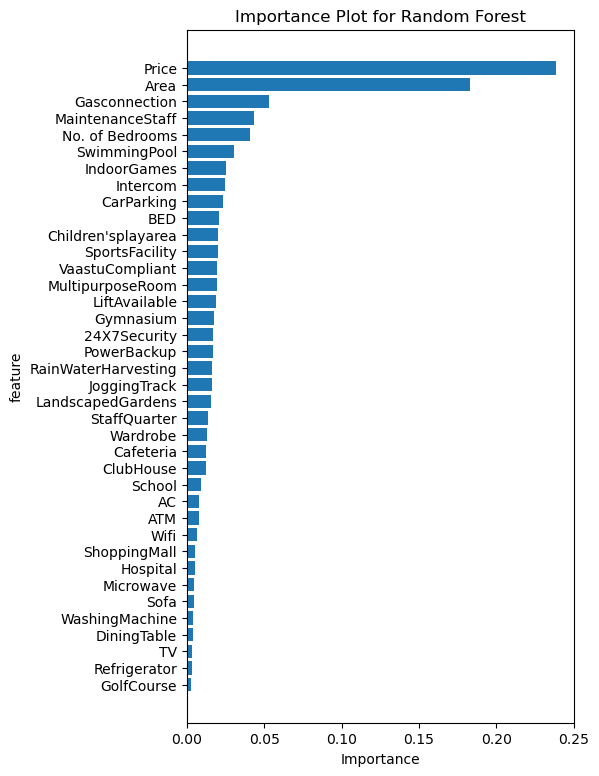

In [88]:
bm_rf =gcv_rf.best_estimator_
imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols, 'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,9))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.ylabel("feature")
plt.title("Importance Plot for Random Forest")
plt.show()

### XGB

In [89]:
X = housing_filtered.drop(['Resale','Location','City'], axis = 1)
y = housing_filtered['Resale']


In [94]:
clf = XGBClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(clf, param_grid=params,verbose=2,cv=kfold,scoring='neg_log_loss')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.001, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=2, n_

[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.08977777777777779, max_depth=3, n_estim

[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.17855555555555558, max_depth=3, n_est

[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.26733333333333337, max_depth=3, n_e

[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.35611111111111116, max_depth=2, n_esti

[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.44488888888888894, max_depth=2, n_esti

[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.5336666666666667, max_depth=2, n_estimators=150;

[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.6224444444444445, max_depth=2, n_estimators=150;

[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.7112222222222223, max_depth=2, n_estimators=150;

[CV] END ....learning_rate=0.8, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.8, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.8, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.8, max_depth=2, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.

In [96]:
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.26733333333333337, 'max_depth': 6, 'n_estimators': 100}
-0.30457954005590965
